# Exploratory Data Analysis

At this stage data is analysed to capture relationships between the target variable: Brewing Method, and potential predictors: other variables in the table.
Hence, removing potential outliers. 

1. First data is read from csv file with clean dataset (clean in the previous project) and transformed into a dataframe.
2. Then data is plotted for each of the variables against the target:
    - check if there is no direct relationships between predictor and target
    - spot outliers
    - observe the data distribution

*Note:* Some of the variables from the original dataset were omitted:
    - price per kg - price does not influence the brewing method, it can be a result of the latter
    - grind - the state of the beans is irrelevant for the target variable
    - variables previously put into higher positioning were also omitted

In [1]:
import pandas as pd

In [2]:
coffee_df = pd.read_csv('data\coffee_desk_dataset_clean.csv', index_col='idx')
coffee_df

,process_general,origin_region,roast,arabica_percentage,pure_arabica,washed,natural,fermented_traditional,fermented_closed_tank,brewing_method
idx,,,,,,,,,,
0,Monsooning,Asia,light,100,True,False,False,False,False,drip
1,Natural,Latam,medium,100,True,False,True,False,False,drip
2,Natural,Africa,light,100,True,False,True,False,False,drip
3,Washed,Africa,light,100,True,True,False,False,False,drip
4,Natural,Asia,dark,100,True,False,True,False,False,drip
...,...,...,...,...,...,...,...,...,...,...
860,Fermented,Latam,light,100,True,False,False,False,False,drip
861,Natural,Latam,light,30,False,False,True,False,False,espresso
862,Hybrid,Latam,light,100,True,True,True,False,False,drip


## Data plotting: brewing method

<AxesSubplot:>

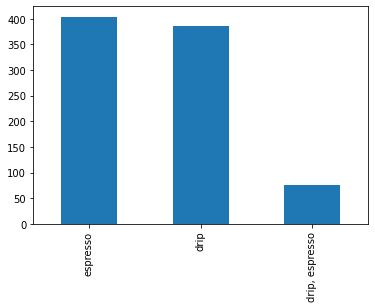

In [3]:
coffee_df['brewing_method'].value_counts().plot(kind='bar')

In [7]:
coffee_df['brewing_method'].value_counts()

espresso          404
drip              386
drip, espresso     75
Name: brewing_method, dtype: int64

### Observation:
Data is visibly evenly distributed among two principal classes.
There is the third class of coffees, which can be used for both brewing with traditioanl espresso style or using more altenative techniques.
Since the principal objective of the client is to be able to buy and offer only the beans which are applicable for the alternative brewing methods (labelled as DRIP), this moxed labels can be changed to DRIP, as in this case they are also good for DRIP but might be cheaper to source, so it would be a missed chance on buiyng cheaper raw materials.

In [40]:
coffee_df['brewing_method_binary'] = coffee_df['brewing_method'].replace({'drip, espresso':'drip'})
coffee_df['brewing_method_binary'].value_counts()

drip        454
espresso    397
Name: brewing_method_binary, dtype: int64

## Data plotting: predictor vs. brewing method

In [4]:
import plotly.express as px
import seaborn as sns

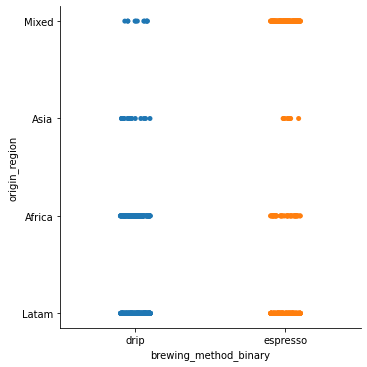

In [41]:
sns.catplot(x='brewing_method_binary', y='origin_region', data=coffee_df, kind="strip")

### Observation:
It is visible that data from Europe is an outlier, given that from this origin only espresso beans proceed. Hence, it would add unnecessary noise to data and it will be removed.

In [21]:
coffee_df = coffee_df[coffee_df["origin_region"] != "Europe"] # removing the missing target value rows
coffee_df

,process_general,origin_region,roast,arabica_percentage,pure_arabica,washed,natural,fermented_traditional,fermented_closed_tank,brewing_method
idx,,,,,,,,,,
0,Monsooning,Asia,light,100,True,False,False,False,False,drip
1,Natural,Latam,medium,100,True,False,True,False,False,drip
2,Natural,Africa,light,100,True,False,True,False,False,drip
3,Washed,Africa,light,100,True,True,False,False,False,drip
4,Natural,Asia,dark,100,True,False,True,False,False,drip
...,...,...,...,...,...,...,...,...,...,...
860,Fermented,Latam,light,100,True,False,False,False,False,drip
861,Natural,Latam,light,30,False,False,True,False,False,espresso
862,Hybrid,Latam,light,100,True,True,True,False,False,drip


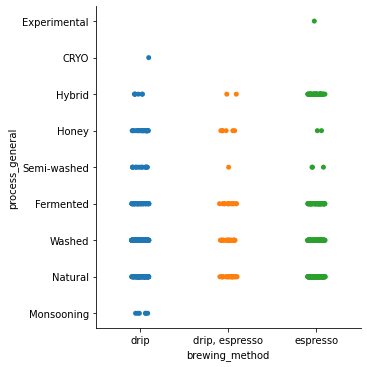

In [28]:
sns.catplot(x='brewing_method_binary', y='process_general', data=coffee_df, kind="strip")

### Observation:
Another variables to be removed are process types: experimental, cryo and monsooning, as they are clearly pointing to one brewing method.

In [113]:
coffee_df = coffee_df[coffee_df["process_general"] != "Experimental"] # removing the missing target value rows
coffee_df = coffee_df[coffee_df["process_general"] != "Monsooning"]
coffee_df = coffee_df[coffee_df["process_general"] != "CRYO"]
coffee_df

,process_general,origin_region,roast,arabica_percentage,pure_arabica,washed,natural,fermented_traditional,fermented_closed_tank,brewing_method,brewing_method_binary,brewing_method_binary_num
idx,,,,,,,,,,,,
1,Natural,Latam,medium,100,True,False,True,False,False,drip,drip,1
2,Natural,Africa,light,100,True,False,True,False,False,drip,drip,1
3,Washed,Africa,light,100,True,True,False,False,False,drip,drip,1
4,Natural,Asia,dark,100,True,False,True,False,False,drip,drip,1
5,Natural,Latam,medium,100,True,False,True,False,False,drip,drip,1
...,...,...,...,...,...,...,...,...,...,...,...,...
860,Fermented,Latam,light,100,True,False,False,False,False,drip,drip,1
861,Natural,Latam,light,30,False,False,True,False,False,espresso,espresso,0
862,Hybrid,Latam,light,100,True,True,True,False,False,drip,drip,1


In [42]:
arabica_fig = px.scatter(coffee_df, x='arabica_percentage', y='brewing_method_binary')
arabica_fig.show()

### Observation:
Another observation to be made is the fact that coffees for drip (alternative) brewing are only pure blends, not mixed between Arabica and Robusta. This relationship can be already drawn from Pue arabica flag variable, hence, this variable will be dropped from dataset.

In [81]:
coffee_df.columns

Index(['process_general', 'origin_region', 'roast', 'arabica_percentage',
       'pure_arabica', 'washed', 'natural', 'fermented_traditional',
       'fermented_closed_tank', 'brewing_method', 'brewing_method_binary',
       'brewing_method_binary_num'],
      dtype='object')

In [30]:
categorical_variables = ['process_general', 'origin_region', 'roast', 'pure_arabica', 'washed', 'natural', 'fermented_traditional', 'fermented_closed_tank']

In [43]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

rows = (len(categorical_variables) // 2)
cols = 2
subplot_titles = tuple(cat + " vs brewing method" for cat in categorical_variables)
fig = make_subplots(rows=rows, cols=cols, subplot_titles=subplot_titles)

for i, cat in enumerate(categorical_variables):
    row = (i // cols) + 1
    col = (i % cols) + 1
    
    fig.add_trace(go.Violin(
        x=coffee_df[cat], y=coffee_df["brewing_method_binary"], name=cat, box_visible=False
    ), row=row, col=col)
    
    fig.update_xaxes(patch=dict(type='category', categoryorder='mean ascending'), row=row, col=col)
    
    
fig.update_layout(height=2000, width=1500)
fig.show()

### Observation:
Washed and Natural flags add little information given data distribustion, there is no observable patter, hence these variables might be dropped from dataset.

In [145]:
coffee_df['brewing_method_binary_num'] = coffee_df['brewing_method_binary'].replace({'drip':1, 'espresso':-1})
coffee_df['brewing_method_binary_num'].value_counts()

 1    420
-1    395
Name: brewing_method_binary_num, dtype: int64

In [142]:
categorical_variables = ['process_general', 'origin_region', 'roast', 'pure_arabica', 'washed', 'natural', 'fermented_traditional', 'fermented_closed_tank']
# categorical_variables = ['process_general', 'origin_region', 'pure_arabica', 'fermented_closed_tank']

In [143]:
categorical_list = ["C({})".format(var) for var in categorical_variables]
categorical_string = " + ".join(categorical_list)
formula_string = "brewing_method_binary_num ~ {}".format(categorical_string)
formula_string

'brewing_method_binary_num ~ C(process_general) + C(origin_region) + C(roast) + C(pure_arabica) + C(washed) + C(natural) + C(fermented_traditional) + C(fermented_closed_tank)'

In [146]:
import statsmodels.formula.api as smf

baseline_model = smf.logit(formula_string, coffee_df).fit()
baseline_model.summary()

ValueError: endog must be in the unit interval.

In [ ]:
coffee_df = coffee_df[coffee_df["process_general"] != "Honey"]